In [3]:
import matplotlib.pyplot as plt
from autogluon.tabular import TabularPredictor
import pickle as pkl
from os.path import join
import pandas as pd

In [4]:
DATA_PATH=join("..", "..", "..", "resources", "database", "default_data.pkl")

with open(DATA_PATH, "rb") as file:
    x_train, x_test, y_train, y_test= pkl.load(file)

In [5]:
predictor = TabularPredictor(label="Price per kg")

No path specified. Models will be saved in: "AutogluonModels/ag-20250528_180905"


In [6]:
train = x_train.copy()
train.insert(column="Price per kg", value=y_train, loc=6)

train

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
104,6,1,5,31,0,0,21
108,10,4,4,26,0,0,24
61,16,3,1,35,1,0,120
3,14,4,4,15,0,1,25
96,12,1,5,30,0,1,30
...,...,...,...,...,...,...,...
67,2,3,8,38,0,1,45
64,12,1,5,30,0,1,25
117,8,4,4,15,0,1,88
47,0,4,3,21,0,2,25


In [7]:
test = x_test.copy()
test.insert(column="Price per kg", value=y_test, loc=6)

test

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
48,10,4,4,26,0,0,28
94,3,3,1,32,0,1,33
95,4,3,1,37,0,1,55
8,10,4,4,15,0,1,35
97,13,1,2,31,1,1,45
22,3,3,1,32,0,1,50
7,0,4,4,15,0,1,35
10,7,4,4,15,0,1,150
45,12,3,8,43,0,0,50
89,8,4,4,15,0,1,90


In [8]:
predictor.fit(train)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Fri Apr 25 15:45:16 UTC 2025
CPU Count:          12
Memory Avail:       21.26 GB / 31.17 GB (68.2%)
Disk Space Avail:   12.93 GB / 79.00 GB (16.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference sp

In [9]:
predictor.leaderboard(test, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-14.742673,-34.798319,root_mean_squared_error,0.015671,0.014304,0.008711,0.015671,0.014304,0.008711,1,True,2
1,RandomForestMSE,-19.461825,-27.219244,root_mean_squared_error,0.055742,0.036151,0.450898,0.055742,0.036151,0.450898,1,True,5
2,ExtraTreesMSE,-22.501828,-30.145802,root_mean_squared_error,0.043401,0.047270,0.392350,0.043401,0.047270,0.392350,1,True,7
3,XGBoost,-26.047800,-29.680520,root_mean_squared_error,0.005019,0.002582,0.250343,0.005019,0.002582,0.250343,1,True,9
4,CatBoost,-26.928300,-24.975119,root_mean_squared_error,0.002291,0.000816,0.156967,0.002291,0.000816,0.156967,1,True,6
5,LightGBMLarge,-26.995769,-29.459296,root_mean_squared_error,0.012316,0.000851,0.227821,0.012316,0.000851,0.227821,1,True,11
6,NeuralNetFastAI,-35.509411,-26.446388,root_mean_squared_error,0.010133,0.007911,2.194097,0.010133,0.007911,2.194097,1,True,8
7,LightGBM,-38.596103,-25.763172,root_mean_squared_error,0.008108,0.004822,0.131840,0.008108,0.004822,0.131840,1,True,4
8,LightGBMXT,-40.446731,-23.713921,root_mean_squared_error,0.008643,0.010284,0.212380,0.008643,0.010284,0.212380,1,True,3
9,NeuralNetTorch,-42.920660,-15.544202,root_mean_squared_error,0.007915,0.006601,2.715705,0.007915,0.006601,2.715705,1,True,10


In [10]:
predict = predictor.predict(test)

In [11]:
outcome = pd.DataFrame(data={
    "target": test["Price per kg"],
    "predict": predict
    }
)

outcome

,target,predict
48,28,26.280598
94,33,51.999382
95,55,55.053486
8,35,43.817158
97,45,41.894554
22,50,51.999382
7,35,23.716734
10,150,51.885612
45,50,45.402550
89,90,51.724312


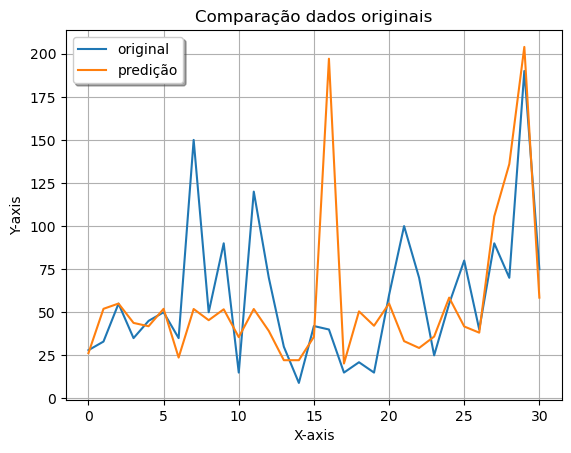

In [12]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predict, label="predição")
plt.title("Comparação dados originais")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()